In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("jumlah_tempat_hiburan1.csv")

In [3]:
data['jenis_tempat_hiburan'] = data['jenis_tempat_hiburan'].astype('category')
data['jenis_tempat_hiburan_encoded'] = data['jenis_tempat_hiburan'].cat.codes

In [4]:
data['jenis_tempat_hiburan_encoded'] = data['jenis_tempat_hiburan_encoded'].astype(float)


In [5]:
print(data.head())


   id  kode_provinsi  kode_kabupaten_kota nama_kabupaten_kota  \
0   1             32                 3201     KABUPATEN BOGOR   
1   2             32                 3201     KABUPATEN BOGOR   
2   3             32                 3201     KABUPATEN BOGOR   
3   4             32                 3201     KABUPATEN BOGOR   
4   5             32                 3201     KABUPATEN BOGOR   

  jenis_tempat_hiburan  jumlah_tempat_hiburan satuan  tahun  \
0           NIGHT CLUB                      0   UNIT   2014   
1                  PUB                      0   UNIT   2014   
2             DISKOTIK                      0   UNIT   2014   
3          KARAOKE/BAR                      0   UNIT   2014   
4          PANTI PIJAT                     43   UNIT   2014   

   jenis_tempat_hiburan_encoded  
0                           2.0  
1                           4.0  
2                           0.0  
3                           1.0  
4                           3.0  


In [6]:
X = data[['jenis_tempat_hiburan_encoded', 'tahun', 'jumlah_tempat_hiburan']]


In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [8]:
prediction = kmeans.predict(X)

In [14]:
import seaborn as sns

In [19]:
prediction = prediction.astype(str)

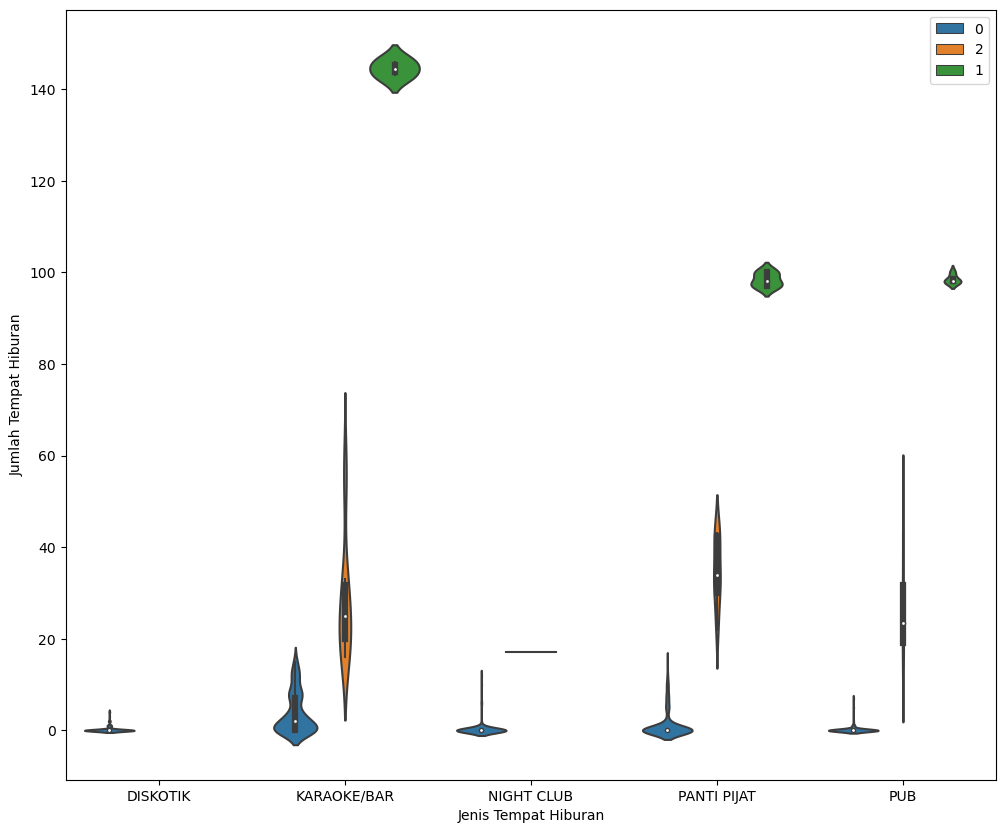

In [21]:
plt.figure(figsize=(12, 10))
sns.violinplot(x='jenis_tempat_hiburan', y='jumlah_tempat_hiburan', hue=prediction, data=data)
plt.xlabel('Jenis Tempat Hiburan')
plt.ylabel('Jumlah Tempat Hiburan')
plt.show()

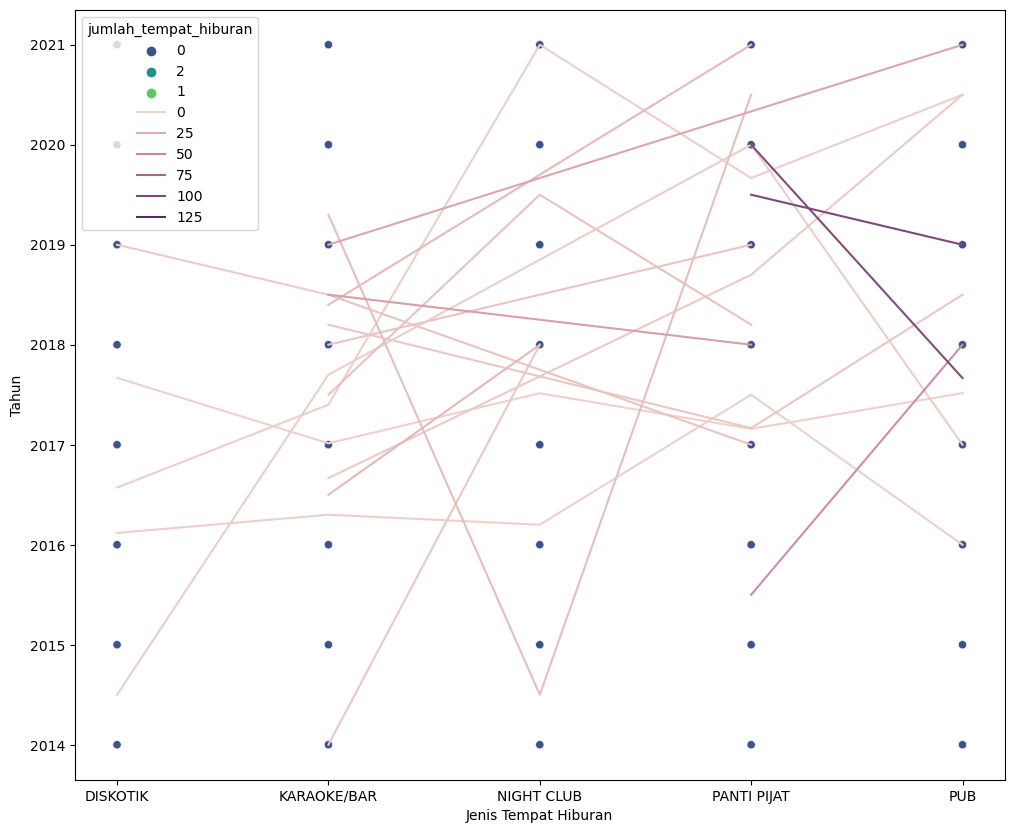

In [27]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='jenis_tempat_hiburan', y='tahun', hue=prediction, palette='viridis', data=data)
plt.xlabel('Jenis Tempat Hiburan')
plt.ylabel('Tahun')
sns.lineplot(x='jenis_tempat_hiburan_encoded', y='tahun', hue='jumlah_tempat_hiburan', color='red', ci=None, data=data)
plt.show()